# 1. Find, Select Data, and Data Processing (load, explore dataset…)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
movies = pd.read_csv(r'/content/drive/MyDrive/movie.csv')
ratings = pd.read_csv(r'/content/drive/MyDrive/rating.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings,values ='rating')
data.head()

<ipython-input-6-4daa18d1f9c3>:1: PerformanceWarning: The following operation may generate 3703856792 cells in the resulting pandas object.
  data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings,values ='rating')


userId,1,2,3,4,5,6,7,8,9,10,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,NaN,5.0,NaN,3.0,NaN,NaN,2.0,NaN,3.5
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.reset_index(level = 0,inplace = True)
numberOf_user_voted_for_movie.head()

,movieId,rating
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161


In [8]:
data.shape

(26744, 138493)

In [9]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))
numberOf_movies_voted_by_user.reset_index(level = 0,inplace = True)
numberOf_movies_voted_by_user.head()

,userId,rating
0,1,175
1,2,61
2,3,187
3,4,28
4,5,66


In [10]:
data.fillna(0,inplace = True)
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,5.0,0.0,3.0,0.0,0.0,2.0,0.0,3.5
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
numberOf_user_voted_for_movie.describe()

,movieId,rating
count,26744.000000,26744.000000
mean,58789.612436,747.841123
std,44159.344871,3085.818268
min,1.000000,1.000000
25%,6795.750000,3.000000
50%,65880.000000,18.000000
75%,99110.500000,205.000000
max,131262.000000,67310.000000


In [12]:
numberOf_movies_voted_by_user.describe()

,userId,rating
count,138493.000000,138493.000000
mean,69247.000000,144.413530
std,39979.629753,230.267257
min,1.000000,20.000000
25%,34624.000000,35.000000
50%,69247.000000,68.000000
75%,103870.000000,155.000000
max,138493.000000,9254.000000


Text(0, 0.5, 'Number Of Users Voted for Movie')

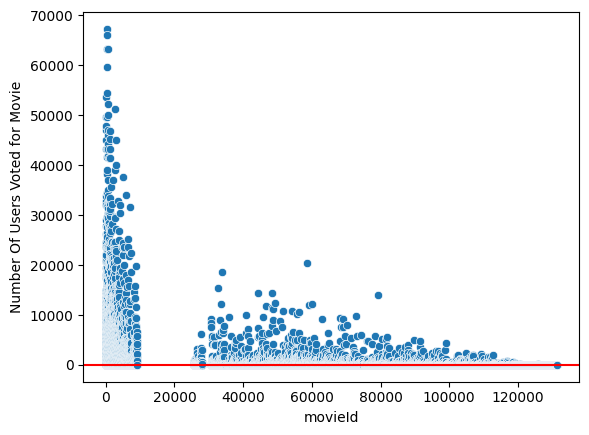

In [13]:
plt.figure()
ax = sns.scatterplot(y = 'rating', x = 'movieId', data = numberOf_user_voted_for_movie)
plt.axhline(y=10,color='r')
plt.ylabel('Number Of Users Voted for Movie')

Text(0, 0.5, 'Number Of Movies rated by user')

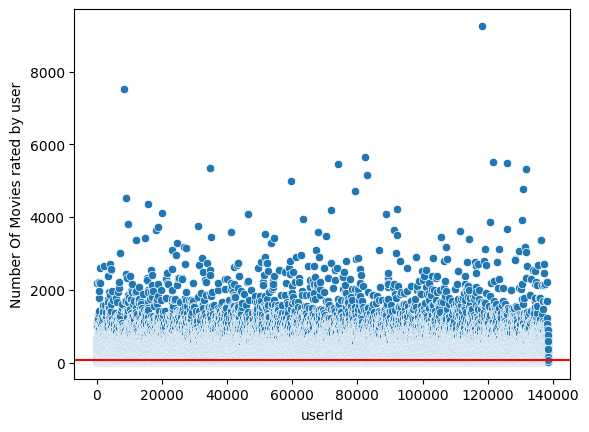

In [14]:
plt.figure()
ax = sns.scatterplot(y = 'rating', x = 'userId', data = numberOf_movies_voted_by_user)
plt.axhline(y=60,color='r')
plt.ylabel('Number Of Movies rated by user')

In [15]:
data_final = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie['rating'] > 10]['movieId'],:]
data_final = data_final.loc[:,numberOf_movies_voted_by_user[numberOf_movies_voted_by_user['rating'] > 60]['userId']]
data_final.shape

(15079, 74657)

In [16]:
data_final

userId,1,2,3,5,7,8,11,13,14,18,...,138474,138475,138477,138483,138484,138486,138487,138490,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,0.0,...,5.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(data_final.values)
data_final.reset_index(inplace=True)

In [18]:
data_final.head()

userId,movieId,1,2,3,5,7,8,11,13,14,...,138474,138475,138477,138483,138484,138486,138487,138490,138492,138493
0,1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,...,5.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.5
1,2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,...,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0
2,3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Implementation: Using numpy, pandas, and sklearn

In [19]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(csr_data)
def get_movie_recommendation(movie_name):
    n= 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId'] #movieId
        movie_idx = data_final[data_final['movieId'] == movie_idx].index[0] #userId acc to movieId
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze(),distances.squeeze())),key=lambda x: x[1])[1::1]
        recommend = []
        recommend2 = []
        for val in rec_movie_indices:
            movie_idx = data_final.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend.append(movies.iloc[idx]['title'].values[0])
            recommend2.append(val[1])
        df1 = pd.DataFrame(recommend)
        df2 = pd.DataFrame(recommend2)
        df = pd.concat([df1,df2],axis = 'columns')
        df.columns = ['Title','Distance']
        df.set_index('Distance',inplace = True)
        return df
    else:
        return "No movies found. Please check your input"

In [20]:
# n = input()
# get_movie_recommendation(n.title())
get_movie_recommendation('Toy Story')

,Title
Distance,
0.351686,Forrest Gump (1994)
0.357812,Star Wars: Episode IV - A New Hope (1977)
0.361007,Jurassic Park (1993)
0.363315,Back to the Future (1985)
0.370372,Toy Story 2 (1999)
0.372051,Star Wars: Episode VI - Return of the Jedi (1983)
0.372855,Aladdin (1992)
0.376934,"Lion King, The (1994)"
0.384040,Star Wars: Episode V - The Empire Strikes Back...


# Front-end deployment

In [21]:
# Install necessary dependencies with forced reinstallation
!pip install --ignore-installed itsdangerous blinker
!pip install --no-deps flask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.6 MB/s eta 0:00:00


In [27]:
from flask import Flask, render_template, request
import pandas as pd
import re
from google.colab import drive
from google.colab.output import eval_js
import requests

# Mount Google Drive
drive.mount('/content/drive')

# Path to templates on Google Drive
TEMPLATE_PATH = '/content/drive/MyDrive/templates'

# Initialize Flask application and specify the templates folder
app = Flask(__name__, template_folder=TEMPLATE_PATH)

# Function to clean movie titles by removing the year
def clean_title(title):
    return re.sub(r'\s\(\d{4}\)$', '', title)

# TMDb API details
TMDB_API_KEY = "cded237d0baeec6b725cacea5d0c4a2c"
TMDB_BASE_URL = "https://api.themoviedb.org/3"
TMDB_IMAGE_BASE_URL = "https://image.tmdb.org/t/p/w500"

placeholder_img = "/content/drive/MyDrive/placeholder.png"

# Function to get movie information using TMDB API
def get_movie_info(movie_title):
    cleaned_title = clean_title(movie_title)
    movie_info_df = movies[movies['clean_title'].str.lower() == cleaned_title.lower()]
    if movie_info_df.empty:
        print(f"Movie '{movie_title}' not found in movies DataFrame.")  # Debug
        return None
    movie_info_local = movie_info_df.iloc[0]

    # Use TMDB API to get poster URL
    search_url = f"{TMDB_BASE_URL}/search/movie"
    params = {
        'api_key': TMDB_API_KEY,
        'query': cleaned_title
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data['results']:
        tmdb_movie_info = data['results'][0]
        poster_path = tmdb_movie_info.get('poster_path')
        if poster_path:
            poster_url = TMDB_IMAGE_BASE_URL + poster_path
        else:
            poster_url = placeholder_img
    else:
        print(f"Movie '{movie_title}' not found in TMDB API.")  # Debug
        poster_url = None

    return {
        'title': movie_info_local['title'],
        'genres': movie_info_local['genres'],
        'poster': poster_url
    }

# Main route
@app.route('/', methods=['GET', 'POST'])
def index():
    recommendations = []
    movie_info = None
    if request.method == 'POST':
        movie_name = request.form.get('movie_name')
        print(f"Received movie name: {movie_name}")  # Debug

        movie_info = get_movie_info(movie_name)
        print(f"Movie info: {movie_info}")  # Debug

        if movie_info:
            # Call your existing get_movie_recommendation() function
            recommendations = get_movie_recommendation(movie_name)
            print(f"Recommendations: {recommendations}")  # Debug

            # If recommendations is not a list, handle it as an error message
            if not isinstance(recommendations, list):
                print(recommendations)  # If it's an error message
                recommendations = []
            else:
                # Update recommendations with poster URLs and genres
                updated_recommendations = []
                for rec in recommendations:
                    rec_info = get_movie_info(rec['title'])
                    if rec_info:
                        rec['poster'] = rec_info['poster']
                        rec['genres'] = rec_info['genres']
                        rec['title'] = rec_info['title']
                        rec['similarity_score'] = rec.get('similarity_score', None)
                        updated_recommendations.append(rec)
                    else:
                        # Handle the case where movie info is not found
                        pass
                recommendations = updated_recommendations

    return render_template('index.html', movie_info=movie_info, recommendations=recommendations)

# Run the app
if __name__ == '__main__':
    # Get the public URL for the Flask app running on port 5000
    print(eval_js("google.colab.kernel.proxyPort(5000)"))
    app.run(port=5000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
https://4gbxpl7pnxv-496ff2e9c6d22116-5000-colab.googleusercontent.com/
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:21:47] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:21:48] "GET /favicon.ico HTTP/1.1" 404 -


Received movie name: Titanic
Movie info: {'title': 'Titanic (1997)', 'genres': 'Drama|Romance', 'poster': 'https://image.tmdb.org/t/p/w500/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg'}
Movie 'Men in Black (a.k.a. MIB) (1997)' not found in TMDB API.
Recommendations: [{'title': 'Men in Black (a.k.a. MIB) (1997)', 'genres': 'Action|Comedy|Sci-Fi', 'poster': None, 'similarity_score': 0.5969043559277559}, {'title': 'Sixth Sense, The (1999)', 'genres': 'Drama|Horror|Mystery', 'poster': 'https://image.tmdb.org/t/p/w500/4AfSDjjCy6T5LA1TMz0Lh2HlpRh.jpg', 'similarity_score': 0.5806000241192953}, {'title': 'Forrest Gump (1994)', 'genres': 'Comedy|Drama|Romance|War', 'poster': 'https://image.tmdb.org/t/p/w500/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg', 'similarity_score': 0.5774724491674184}, {'title': 'Matrix, The (1999)', 'genres': 'Action|Sci-Fi|Thriller', 'poster': 'https://image.tmdb.org/t/p/w500/9TGHDvWrqKBzwDxDodHYXEmOE6J.jpg', 'similarity_score': 0.5750055675244856}, {'title': 'Good Will Hunting (1997)', 'genre

INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:21:53] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:21:53] "GET /None HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:21:53] "GET /favicon.ico HTTP/1.1" 404 -


Received movie name: Men in Black (a.k.a. MIB)
Movie 'Men in Black (a.k.a. MIB)' not found in TMDB API.
Movie info: {'title': 'Men in Black (a.k.a. MIB) (1997)', 'genres': 'Action|Comedy|Sci-Fi', 'poster': None}
Movie 'Independence Day (a.k.a. ID4) (1996)' not found in TMDB API.
Recommendations: [{'title': 'Matrix, The (1999)', 'genres': 'Action|Sci-Fi|Thriller', 'poster': 'https://image.tmdb.org/t/p/w500/9TGHDvWrqKBzwDxDodHYXEmOE6J.jpg', 'similarity_score': 0.6990085146022622}, {'title': 'Back to the Future (1985)', 'genres': 'Adventure|Comedy|Sci-Fi', 'poster': 'https://image.tmdb.org/t/p/w500/fNOH9f1aA7XRTzl1sAOx9iF553Q.jpg', 'similarity_score': 0.6675499887574908}, {'title': 'Fifth Element, The (1997)', 'genres': 'Action|Adventure|Comedy|Sci-Fi', 'poster': 'https://image.tmdb.org/t/p/w500/fPtlCO1yQtnoLHOwKtWz7db6RGU.jpg', 'similarity_score': 0.6592384073160971}, {'title': 'Star Wars: Episode VI - Return of the Jedi (1983)', 'genres': 'Action|Adventure|Sci-Fi', 'poster': 'https://im

INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:22:26] "POST / HTTP/1.1" 200 -


Movie 'Independence Day (a.k.a. ID4) (1996)' not found in TMDB API.


INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:22:27] "GET /None HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:22:27] "GET /favicon.ico HTTP/1.1" 404 -


Received movie name: Finding Nemo
Movie info: {'title': 'Finding Nemo (2003)', 'genres': 'Adventure|Animation|Children|Comedy', 'poster': 'https://image.tmdb.org/t/p/w500/eHuGQ10FUzK1mdOY69wF5pGgEf5.jpg'}
Recommendations: [{'title': 'Monsters, Inc. (2001)', 'genres': 'Adventure|Animation|Children|Comedy|Fantasy', 'poster': 'https://image.tmdb.org/t/p/w500/wFSpyMsp7H0ttERbxY7Trlv8xry.jpg', 'similarity_score': 0.7234736554443555}, {'title': 'Shrek (2001)', 'genres': 'Adventure|Animation|Children|Comedy|Fantasy|Romance', 'poster': 'https://image.tmdb.org/t/p/w500/iB64vpL3dIObOtMZgX3RqdVdQDc.jpg', 'similarity_score': 0.701513120364707}, {'title': 'Incredibles, The (2004)', 'genres': 'Action|Adventure|Animation|Children|Comedy', 'poster': 'https://image.tmdb.org/t/p/w500/2LqaLgk4Z226KkgPJuiOQ58wvrm.jpg', 'similarity_score': 0.6997558134051033}, {'title': 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'genres': 'Action|Adventure|Comedy|Fantasy', 'poster': 'https://image.tmd

INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:22:56] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:22:57] "GET /favicon.ico HTTP/1.1" 404 -


Received movie name: 12 years a slave
Movie info: {'title': '12 Years a Slave (2013)', 'genres': 'Drama', 'poster': 'https://image.tmdb.org/t/p/w500/xdANQijuNrJaw1HA61rDccME4Tm.jpg'}
Recommendations: [{'title': 'Dallas Buyers Club (2013)', 'genres': 'Drama', 'poster': 'https://image.tmdb.org/t/p/w500/7Fdh7gUq3plvQqxRbNYhWvDABXA.jpg', 'similarity_score': 0.48884883321027806}, {'title': 'Captain Phillips (2013)', 'genres': 'Adventure|Drama|Thriller|IMAX', 'poster': 'https://image.tmdb.org/t/p/w500/vjsEi2JytAT76qrtUHPIhXExZAm.jpg', 'similarity_score': 0.4657566973616769}, {'title': 'American Hustle (2013)', 'genres': 'Crime|Drama', 'poster': 'https://image.tmdb.org/t/p/w500/koXGRfatN0tURFWMA0Keb0p0Gtg.jpg', 'similarity_score': 0.4586465015585415}, {'title': 'Wolf of Wall Street, The (2013)', 'genres': 'Comedy|Crime|Drama', 'poster': 'https://image.tmdb.org/t/p/w500/34m2tygAYBGqA9MXKhRDtzYd4MR.jpg', 'similarity_score': 0.45417244129420686}, {'title': 'Gravity (2013)', 'genres': 'Action|Sci

INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:23:21] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:23:21] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:23:34] "POST / HTTP/1.1" 200 -


Received movie name: Interstella
Movie 'Interstella' not found in movies DataFrame.
Movie info: None


INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:23:35] "GET /favicon.ico HTTP/1.1" 404 -


Received movie name: 12 years a slave
Movie info: {'title': '12 Years a Slave (2013)', 'genres': 'Drama', 'poster': 'https://image.tmdb.org/t/p/w500/xdANQijuNrJaw1HA61rDccME4Tm.jpg'}
Recommendations: [{'title': 'Dallas Buyers Club (2013)', 'genres': 'Drama', 'poster': 'https://image.tmdb.org/t/p/w500/7Fdh7gUq3plvQqxRbNYhWvDABXA.jpg', 'similarity_score': 0.48884883321027806}, {'title': 'Captain Phillips (2013)', 'genres': 'Adventure|Drama|Thriller|IMAX', 'poster': 'https://image.tmdb.org/t/p/w500/vjsEi2JytAT76qrtUHPIhXExZAm.jpg', 'similarity_score': 0.4657566973616769}, {'title': 'American Hustle (2013)', 'genres': 'Crime|Drama', 'poster': 'https://image.tmdb.org/t/p/w500/koXGRfatN0tURFWMA0Keb0p0Gtg.jpg', 'similarity_score': 0.4586465015585415}, {'title': 'Wolf of Wall Street, The (2013)', 'genres': 'Comedy|Crime|Drama', 'poster': 'https://image.tmdb.org/t/p/w500/34m2tygAYBGqA9MXKhRDtzYd4MR.jpg', 'similarity_score': 0.45417244129420686}, {'title': 'Gravity (2013)', 'genres': 'Action|Sci

INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:23:41] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Nov/2024 16:23:41] "GET /favicon.ico HTTP/1.1" 404 -


# 2. Implementation: Using the Surprise library

In [29]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=c3f3343c5ee640404d3b5fab55b169d31363a69abd00a8afe2cbb6eb3543b0b3
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [36]:
# Data Sampling and Preparation (Do this once)
ratings_sampled = ratings.sample(n=100000, random_state=42)

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_sampled[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [37]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define KNN parameters
sim_options = {
    'name': 'cosine',
    'user_based': False,
}

knn_model = KNNBasic(sim_options=sim_options, min_k=1, k=10)

# Training and testing
try:
    print("Starting model training...")
    knn_model.fit(trainset)
    print("Training successful.")

    predictions = knn_model.test(testset)

    rmse = accuracy.rmse(predictions)
    print(f"RMSE on test set: {rmse:.4f}")

except ZeroDivisionError as e:
    print("A ZeroDivisionError occurred during computation.")

print("Testing completed.")


Starting model training...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Training successful.
RMSE: 1.0652
RMSE on test set: 1.0652
Testing completed.


In [38]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define parameters for the KNNBasic model with a new similarity measure
sim_options = {
    'name': 'pearson_baseline',
    'user_based': False,
}

# Create KNNBasic model with parameters
knn_model = KNNBasic(sim_options=sim_options, min_k=1, k=10)

# Add print statements to check each step
try:
    print("Starting model training...")
    knn_model.fit(trainset)
    print("Training successful.")

    # Predict on the test set
    predictions = knn_model.test(testset)

    # Calculate and print RMSE
    rmse = accuracy.rmse(predictions)
    print(f"RMSE on test set: {rmse:.4f}")

except ZeroDivisionError as e:
    print("A ZeroDivisionError occurred during the computation of the similarity matrix.")

    # Access the user-item matrix to see if any items have all zero ratings
    user_item_matrix = ratings_sampled.pivot(index='userId', columns='movieId', values='rating').fillna(0)

    zero_columns = user_item_matrix.columns[(user_item_matrix == 0).all()]

    if len(zero_columns) > 0:
        print(f"The following items have no ratings (all values are 0): {zero_columns.tolist()}")
    else:
        print("There are no items with all values as 0.")

print("Testing completed.")


Starting model training...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Training successful.
RMSE: 1.0520
RMSE on test set: 1.0520
Testing completed.


In [41]:
from surprise import AlgoBase, Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd
import numpy as np
from scipy.spatial.distance import cityblock, euclidean

# Load 'movies' and 'ratings' DataFrames
# Assuming they are already loaded

# Sample the data to reduce computation time
ratings_sampled = ratings.sample(n=100000, random_state=42)

# Prepare the data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_sampled[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Get the set of users and items in the training set
train_users = set([trainset.to_raw_uid(u) for u in range(trainset.n_users)])
train_items = set([trainset.to_raw_iid(i) for i in range(trainset.n_items)])

# Filter the test set to include only users and items present in the training set
filtered_testset = [(uid, iid, r) for (uid, iid, r) in testset if uid in train_users and iid in train_items]

# Define L1 and L2 distance functions
def l1_distance(x, y):
    return np.sum(np.abs(x - y))  # Vectorized Manhattan distance (L1)

def l2_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))  # Vectorized Euclidean distance (L2)

# Create a custom KNN class using L1 or L2 distances
class KNNCustom(AlgoBase):
    def __init__(self, distance_func, k=10):
        super().__init__()
        self.distance_func = distance_func
        self.k = k

    def fit(self, trainset):
        super().fit(trainset)
        self.trainset = trainset

        # Build the item-user matrix for item-based filtering
        self.item_user_matrix = np.zeros((trainset.n_items, trainset.n_users))
        for uid, iid, rating in trainset.all_ratings():
            self.item_user_matrix[int(iid), int(uid)] = rating
        return self

    def estimate(self, u, i):
        if not self.trainset.knows_user(u):
            return self.trainset.global_mean
        if not self.trainset.knows_item(i):
            return self.trainset.global_mean

        # Get the items rated by the user
        user_ratings = self.trainset.ur[u]  # List of (item_inner_id, rating)
        user_items = [item_id for (item_id, _) in user_ratings]

        item_vector = self.item_user_matrix[i]
        distances = []

        # Compute distance to items the user has rated
        for neighbor_item in user_items:
            if neighbor_item != i:
                neighbor_vector = self.item_user_matrix[neighbor_item]
                dist = self.distance_func(item_vector, neighbor_vector)
                distances.append((dist, neighbor_item))

        # Sort and select k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:self.k]

        # Convert user_ratings to a dictionary for fast lookup
        user_ratings_dict = dict(user_ratings)

        # Compute prediction using ratings from similar items
        sum_ratings, sum_weights = 0, 0
        for dist, neighbor_item in k_nearest_neighbors:
            neighbor_rating = user_ratings_dict.get(neighbor_item)
            if neighbor_rating is not None:
                weight = 1.0 if dist == 0 else 1.0 / dist
                sum_ratings += neighbor_rating * weight
                sum_weights += weight

        if sum_weights == 0:
            # Return the user's mean rating if no similar items are found
            return np.mean([r for (_, r) in user_ratings])
        else:
            return sum_ratings / sum_weights

# Compare methods (Cosine, Pearson, Pearson Baseline, MSD, L1, L2)
similarity_options = [
    {'name': 'cosine', 'user_based': False},
    {'name': 'pearson', 'user_based': False},
    {'name': 'pearson_baseline', 'user_based': False},
    {'name': 'msd', 'user_based': False},
]

# Initialize a dictionary to store RMSE results for each method
rmse_results = {}

for sim_option in similarity_options:
    sim_name = sim_option['name']
    print(f"\nTraining KNN model with {sim_name} similarity...")

    # Create and train KNNBasic model with each similarity measure
    knn_model = KNNBasic(sim_options=sim_option, k=10, min_k=1)
    knn_model.fit(trainset)

    # Predict on the filtered test set and compute RMSE
    predictions = knn_model.test(filtered_testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_results[sim_name] = rmse

# Test with L1 and L2 distances
custom_distance_methods = {'L1': l1_distance, 'L2': l2_distance}

for dist_name, dist_func in custom_distance_methods.items():
    print(f"\nTraining KNN model with {dist_name} distance...")
    knn_custom_model = KNNCustom(distance_func=dist_func, k=10)
    knn_custom_model.fit(trainset)

    # Predict on the filtered test set and compute RMSE
    predictions = knn_custom_model.test(filtered_testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_results[dist_name] = rmse

# Compare RMSE results of each method
print("\nComparison of RMSE results for different similarity measures:")
for sim_name, rmse_value in rmse_results.items():
    print(f"{sim_name} similarity/distance: RMSE = {rmse_value:.4f}")



Training KNN model with cosine similarity...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0652

Training KNN model with pearson similarity...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0434

Training KNN model with pearson_baseline similarity...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0436

Training KNN model with msd similarity...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0653

Training KNN model with L1 distance...
RMSE: 1.2085

Training KNN model with L2 distance...
RMSE: 1.1971

Comparison of RMSE results for different similarity measures:
cosine similarity/distance: RMSE = 1.0652
pearson similarity/distance: RMSE = 1.0434
pearson_baseline similarity/distance: RMSE = 1.0436
msd similarity/distance: RMSE = 1.0653
L1 similarity/distance: RMSE = 1.2085
L2 similarity/distance: RMSE =

In [34]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define similarity options for KNNBasic
sim_option = {
    'name': 'cosine',     # Use cosine similarity
    'user_based': True,   # True for user-based collaborative filtering
}

# Create the KNNBasic model with the parameters
knn_model = KNNBasic(sim_options=sim_option, min_k=1, k=10)

# Train the model
print("Starting model training...")
knn_model.fit(trainset)
print("Training successful.")

# Function to predict rating for a specific userId and movieId
def predict_rating_for_user_item(user_id, movie_id):
    try:
        prediction = knn_model.predict(user_id, movie_id)
        print(f"Prediction for user_id={user_id}, movie_id={movie_id}: {prediction.est:.4f}")
    except Exception as e:
        print(f"Error during prediction: {e}")

# Select a userId and movieId that exist in the training set
# Get all userIds and movieIds from the training set
train_user_ids = set([trainset.to_raw_uid(i) for i in range(trainset.n_users)])
train_movie_ids = set([trainset.to_raw_iid(i) for i in range(trainset.n_items)])

# Pick a random userId and movieId from the training set
user_id_input = np.random.choice(list(train_user_ids))
movie_id_input = np.random.choice(list(train_movie_ids))

# Ensure IDs are in the correct type (int)
user_id_input = int(user_id_input)
movie_id_input = int(movie_id_input)

# Predict the rating
print(f"Predicting rating for user_id={user_id_input}, movie_id={movie_id_input}")
predict_rating_for_user_item(user_id_input, movie_id_input)

# Evaluate on the test set and compute RMSE
print("\nEvaluating model on the test set...")
predictions = knn_model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE on test set: {rmse:.4f}")


Starting model training...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Training successful.
Predicting rating for user_id=117883, movie_id=62265
Prediction for user_id=117883, movie_id=62265: 3.5280

Evaluating model on the test set...
RMSE: 1.0621
RMSE on test set: 1.0621


# **3. Implementation: Use numpy, pandas, and sklearn.**

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Optional: Sample the data to reduce computation time
ratings_sampled = ratings.sample(n=100000, random_state=42)

# Split the data into training and test sets
train_data, test_data = train_test_split(ratings_sampled, test_size=0.2, random_state=42)

# Create a user-item interaction matrix for the training data
train_user_item_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Create a user-item interaction matrix for the test data (for evaluation purposes)
test_user_item_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Ensure that the userIds and movieIds in the test set are present in the training set
test_data = test_data[test_data['userId'].isin(train_user_item_matrix.index) &
                      test_data['movieId'].isin(train_user_item_matrix.columns)]

# Re-create the test_user_item_matrix after filtering
test_user_item_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Compute cosine similarity between users
def cosine_similarity(matrix):
    # Normalize the matrix (to handle users with different rating scales)
    norm_matrix = matrix - matrix.mean(axis=1).values.reshape(-1, 1)
    # Compute the dot product between users
    sim_matrix = np.dot(norm_matrix, norm_matrix.T)
    # Compute the magnitude of vectors for each user
    magnitude = np.sqrt(np.sum(norm_matrix ** 2, axis=1))
    # Compute the outer product of magnitudes
    mag_product = np.outer(magnitude, magnitude)
    # Handle division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        sim_matrix = np.divide(sim_matrix, mag_product)
        sim_matrix[np.isnan(sim_matrix)] = 0  # Replace NaN with 0
    # Set diagonal to 0 to exclude self-similarity
    np.fill_diagonal(sim_matrix, 0)
    return pd.DataFrame(sim_matrix, index=matrix.index, columns=matrix.index)

# Create the user similarity matrix
user_similarity = cosine_similarity(train_user_item_matrix)

# Function to find k nearest neighbors for a user
def find_knn(user_id, k):
    if user_id in user_similarity.index:
        sim_scores = user_similarity.loc[user_id]
        knn_users = sim_scores.nlargest(k).index.values
        return knn_users
    else:
        return []

# Predict rating for a user and item using KNN collaborative filtering
def predict_rating(user_id, item_id, k=5):
    if user_id not in train_user_item_matrix.index or item_id not in train_user_item_matrix.columns:
        # Return global mean if user or item is unknown
        return train_data['rating'].mean()

    knn_users = find_knn(user_id, k)

    # Get the ratings of the k nearest neighbors for the item
    neighbor_ratings = train_user_item_matrix.loc[knn_users, item_id]

    # Get the similarity scores
    sim_scores = user_similarity.loc[user_id, knn_users]

    # Filter out neighbors who haven't rated the item
    mask = neighbor_ratings > 0
    neighbor_ratings = neighbor_ratings[mask]
    sim_scores = sim_scores[mask]

    if sim_scores.sum() > 0:
        predicted_rating = np.dot(sim_scores, neighbor_ratings) / sim_scores.sum()
    else:
        # If no neighbors have rated the item, return the user's average rating
        predicted_rating = train_user_item_matrix.loc[user_id].replace(0, np.NaN).mean()
        if np.isnan(predicted_rating):
            # If the user hasn't rated any items, return the global mean
            predicted_rating = train_data['rating'].mean()

    return predicted_rating

# Evaluate the model on the test set
y_true = []
y_pred = []

print("Evaluating the model...")

for index, row in test_data.iterrows():
    user_id = row['userId']
    item_id = row['movieId']
    true_rating = row['rating']
    predicted_rating = predict_rating(user_id, item_id, k=5)
    y_true.append(true_rating)
    y_pred.append(predicted_rating)

# Compute RMSE
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"RMSE on the test set: {rmse:.4f}")


Evaluating the model...
RMSE on the test set: 1.1887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Optional: Sample the data to reduce computation time
ratings_sampled = ratings.sample(n=100000, random_state=42)

# Split the data into training and test sets
train_data, test_data = train_test_split(ratings_sampled, test_size=0.2, random_state=42)

# Create a user-item interaction matrix for the training data
train_user_item_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Create a user-item interaction matrix for the test data (for evaluation purposes)
test_user_item_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Ensure that the userIds and movieIds in the test set are present in the training set
test_data = test_data[test_data['userId'].isin(train_user_item_matrix.index) &
                      test_data['movieId'].isin(train_user_item_matrix.columns)]

# Re-create the test_user_item_matrix after filtering
test_user_item_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Function to compute cosine similarity between users
def cosine_similarity(matrix):
    # Normalize the matrix (subtract mean user ratings)
    norm = np.linalg.norm(matrix, axis=1)
    # Avoid division by zero
    norm[norm == 0] = 1e-10
    similarity_matrix = np.dot(matrix, matrix.T) / (norm[:, None] * norm[None, :])
    # Replace NaN values with 0
    similarity_matrix = np.nan_to_num(similarity_matrix)
    np.fill_diagonal(similarity_matrix, 0)
    return similarity_matrix

# Function to compute Pearson similarity between users
def pearson_similarity(matrix):
    mean_user_rating = np.mean(matrix, axis=1, keepdims=True)
    mean_centered = matrix - mean_user_rating
    # Compute the numerator and denominator
    numerator = np.dot(mean_centered, mean_centered.T)
    denominator = np.linalg.norm(mean_centered, axis=1)[:, None] * np.linalg.norm(mean_centered, axis=1)[None, :]
    # Avoid division by zero
    denominator[denominator == 0] = 1e-10
    similarity_matrix = numerator / denominator
    # Replace NaN values with 0
    similarity_matrix = np.nan_to_num(similarity_matrix)
    np.fill_diagonal(similarity_matrix, 0)
    return similarity_matrix

# Function to compute MSD similarity between users
def msd_similarity(matrix):
    num_users = matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))

    print("Computing MSD similarity matrix...")
    for i in range(num_users):
        diff = matrix[i] - matrix  # Difference between user i and all other users
        mse = np.mean((diff) ** 2, axis=1)  # Mean Squared Error
        similarity = 1 / (1 + mse)  # Convert MSE to similarity
        similarity_matrix[i] = similarity
        similarity_matrix[i, i] = 0  # Set self-similarity to 0

        # Progress indicator
        if i % 100 == 0 or i == num_users - 1:
            print(f"Processed {i + 1}/{num_users} users")

    return similarity_matrix

# Compute similarity matrices
user_similarity_cosine = cosine_similarity(train_user_item_matrix.values)
user_similarity_pearson = pearson_similarity(train_user_item_matrix.values)
user_similarity_msd = msd_similarity(train_user_item_matrix.values)

# Function to find k nearest neighbors for a user
def find_knn(user_index, k, similarity_matrix):
    # Get the similarity scores for the user
    sim_scores = similarity_matrix[user_index]
    # Find the indices of the top k similar users
    knn_indices = np.argsort(sim_scores)[-k:]
    # Reverse the array to have the most similar users first
    knn_indices = knn_indices[::-1]
    return knn_indices

# Function to predict rating for a user and item using KNN collaborative filtering
def predict_rating(user_id, item_id, k=5, similarity_matrix=user_similarity_cosine):
    if user_id not in train_user_item_matrix.index or item_id not in train_user_item_matrix.columns:
        # Return global mean if user or item is unknown
        return train_data['rating'].mean()

    user_index = train_user_item_matrix.index.get_loc(user_id)
    item_index = train_user_item_matrix.columns.get_loc(item_id)

    # Find k nearest neighbors of the user
    knn_users = find_knn(user_index, k, similarity_matrix)

    # Get the similarity scores of the k nearest neighbors
    sim_scores = similarity_matrix[user_index, knn_users]

    # Get the ratings of the k nearest neighbors for the item
    neighbor_ratings = train_user_item_matrix.values[knn_users, item_index]

    # Filter out neighbors who haven't rated the item
    mask = neighbor_ratings > 0
    sim_scores = sim_scores[mask]
    neighbor_ratings = neighbor_ratings[mask]

    if np.sum(sim_scores) > 0:
        predicted_rating = np.dot(sim_scores, neighbor_ratings) / np.sum(sim_scores)
    else:
        # If no neighbors have rated the item, return the user's average rating
        user_ratings = train_user_item_matrix.loc[user_id].replace(0, np.NaN)
        predicted_rating = user_ratings.mean()
        if np.isnan(predicted_rating):
            # If the user hasn't rated any items, return the global mean
            predicted_rating = train_data['rating'].mean()

    return predicted_rating

# Function to count users who have rated items and those who haven't
def count_users(matrix):
    # Users who have rated at least one item
    users_done = np.sum(np.sum(matrix > 0, axis=1) > 0)
    # Users who haven't rated any items
    users_not_done = matrix.shape[0] - users_done
    return users_done, users_not_done

# Count the number of users
users_done, users_not_done = count_users(train_user_item_matrix.values)
print(f"Number of users who have rated items: {users_done}")
print(f"Number of users who haven't rated any items: {users_not_done}")

# Evaluate the model on the test set for each similarity measure
methods = {
    'Cosine': user_similarity_cosine,
    'Pearson': user_similarity_pearson,
    'MSD': user_similarity_msd
}

for method_name, similarity_matrix in methods.items():
    y_true = []
    y_pred = []
    print(f"\nEvaluating using {method_name} similarity...")

    for index, row in test_data.iterrows():
        user_id = row['userId']
        item_id = row['movieId']
        true_rating = row['rating']
        predicted_rating = predict_rating(user_id, item_id, k=5, similarity_matrix=similarity_matrix)
        y_true.append(true_rating)
        y_pred.append(predicted_rating)

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"RMSE on the test set using {method_name} similarity: {rmse:.4f}")


Computing MSD similarity matrix...
Processed 1/45504 users
Processed 101/45504 users
Processed 201/45504 users
Processed 301/45504 users
Processed 401/45504 users
Processed 501/45504 users
Processed 601/45504 users
Processed 701/45504 users
Processed 801/45504 users
Processed 901/45504 users
Processed 1001/45504 users
Processed 1101/45504 users
Processed 1201/45504 users
Processed 1301/45504 users
Processed 1401/45504 users
Processed 1501/45504 users
Processed 1601/45504 users
Processed 1701/45504 users
Processed 1801/45504 users
Processed 1901/45504 users
Processed 2001/45504 users
Processed 2101/45504 users
Processed 2201/45504 users
Processed 2301/45504 users
